<center>
<table style="border:none">
    <tr style="border:none">
    <th style="border:none">
        <a  href='https://colab.research.google.com/github/AmirMardan/ml_course/blob/main/7_fully_connected_nn/1_intro_to_NN.ipynb'><img src='https://colab.research.google.com/assets/colab-badge.svg'></a>
    </th>
    <th style="border:none">
        <a  href='https://github1s.com/AmirMardan/ml_course/blob/main/7_fully_connected_nn/1_intro_to_NN.ipynb'><img src='../imgs/open_vscode.svg' height=20px width=115px></a>
    </th>
    </tr>
</table>
</center>


This notebook is created by <a href='https://amirmardan.github.io/'> Amir Mardan</a>. For any feedback or suggestion, please contact me via <a href="mailto:mardan.amir.h@gmail.com">email</a>, (mardan.amir.h@gmail.com).



<a name='top'></a>
# Fully Connected Neural Networks

In this notebook, we learn about fully connected neural networks (FCNNs).
In FCNNs, every node in one layer is connected to all nodes in the previous and the next layer.

<center>
<img src='./img/fcnns.png' width=400px>
<br>
<b>Figure 1:</b> An example of fully connected neural network.
</center>

FCNNs are “structure agnostic” and there are no special assumptions needed to be made about the input.

Mathematically speaking, a fully connected layer is a function from $\mathbb{R}^m$ to $\mathbb{R}^n$.

    Imagine we have the input of fully connected layer as $x \in \mathbb{R}^m$.
Then, considering the $i$-th output of this layer as $y_i \in \mathbb{R}$,

$
y_i = \sigma (w_1 x_1 + \dotsb + w_m x_m),
$
where $\sigma$ is an [activation function](https://en.wikipedia.org/wiki/Activation_function) and $w_i$ are learnable parameters in the network.
Now, the output of this layer is 

\begin{equation}
y = \left[
    \begin{array}{c}
    \sigma (w_{1,1} x_1 + \dotsb + w_{1,m} x_m)\\
    \vdots\\
    \sigma (w_{n,1} x_1 + \dotsb + w_{n,m} x_m)
    \end{array}
\right]
\end{equation}

This is how the connection between two layers works.
A network with multiple fully connected layers is called a ***deep*** network.
However, in this notebook, we create shallow networks from scratch and TensorFlow to learn the basic concept of fully connected networks.

This notebook will cover the following topics:

- [1. One Input - One Output](#1in_1out)
    - [1.1 What does training mean?](#meaning_training)
    - [1.2 How to update model parameters](#updating_parameters)
    - [1.3 Activation Function](#activation_function)
    - [1.4 Pseudo-code For Artificial Neural Network](#Pseudo_code)
    - [1.5 Training From Scratch](#training_1)
    - [1.6 Training With TensorFlow](#training_1_tf)
- [2. Multiple Input - One Output](#2in_1out)
    - [2.1 Training From Scratch](#training_2)
    - [2.2 Training With TensorFlow](#training_2_tf)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import copy

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


I'm currently using `TensorFlow version: 2.8.0`.

<a id='1in_1out'></a>
## 1. One Input - One Output

Let's talk about the easiest version of NN.



<center>
<img src='./img/1in_1out.png' alt='1in_1out' height=200px>
</center>

Imagine we have the input of a fully connected layer as $x \in \mathbb{R}^2$.
Then, considering the output of this layer as $y \in \mathbb{R}$,

\begin{equation}
y = \sigma (b + w_1 x_1),
\end{equation}

where $\sigma$ is an [activation function](https://en.wikipedia.org/wiki/Activation_function) and $w$ and $b$ are learnable parameters in the network.


Let's imagine our input has `100` samples while `m = 2`. 
So, input should have 1 (m - 1) column (`input_shape=1`).
We also have only one output, `units = 1`.


In [2]:
N = 100
m = 2 
units = 1
input_shape = m - 1

X = np.random.randn(input_shape, N)
b_true = 2
w_true = np.array([5]).reshape(input_shape, units)

noise_scale = 0.5
noise = np.random.normal(scale=noise_scale, size=(1, N))
y = w_true.T @ X + b_true + noise

print(f"Shape of X: {X.shape}")
print(f'Shape of y: {y.shape}')
print(f'Shape of W: {w_true.shape}')
print(f'Shape of b: {np.shape(b_true)}')

Shape of X: (1, 100)
Shape of y: (1, 100)
Shape of W: (1, 1)
Shape of b: ()


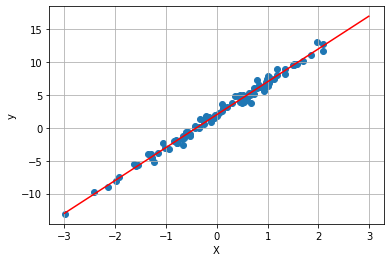

In [3]:
x_test = np.arange(-3, 3, 0.01).reshape(1, -1)
y_pred = w_true.T @ x_test + b_true

plt.scatter(X, y)
plt.plot(x_test.T, y_pred.T, 'r')
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
    

<a id='meaning_training'></a>
### 1.1 What does training mean?

As you know, we train a network to predict the correct label for our data samples.
As is shown in previous cell (`y_pred = x_test @ w_true + b_true`) the predicted label depends on not only data samples, but also ***weight*** (`w_true`) and ***bias*** (`b_true`) of the model.
So, the goal of the neural network is to find the correct weight and bias for a model which can be called model parameters.
This is happening by using random values for these two parameters and comparing the predicted value with the correct one.
The difference between the predicted and observed value is called ***loss*** or ***cost***.
Hence, training is the problem of minimizing the loss by updating the model parameters.
So, the general procedure of training can be written as

1. Initialize model parameters ($W$ and $b$)
2. Calculate the loss
3. <b>While</b> loss > desired loss <b>do:</b>

    4. update the model parameters
    5. Calculate the loss


<a id='updating_parameters'></a>
### 1.2 How to update model parameters?

The loss function we use for a regression problem can be mean squared error as

\begin{equation}
\ell = \frac{1}{N}\sum_{i=1}^{N}(y_{observed} - y_{predicted})^2,
\end{equation}

where $N$ is number of data points.

In [4]:
def loss_function(y_observed, y_predicted):
    n = y_observed.size
    
    res = y_observed - y_predicted
    return 1/n * np.sum(res * res)

We know that `w_true = 5`. Let's plot the loss for `w` in a range of [-40 to 40].

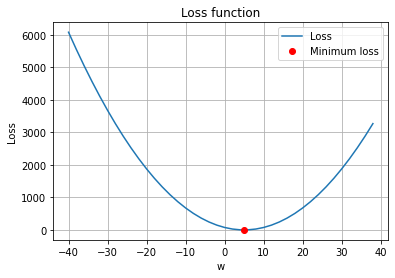

In [5]:
loss = []
y_obs = w_true.T @ x_test + b_true

ws = np.arange(-40, 40, 2)
for w in ws:
    w = w.reshape(-1, 1)
    y_pred = w.T @ x_test + b_true
    
    loss.append(loss_function(y_obs, y_pred))
    
plt.plot(ws, loss, label='Loss')
plt.plot(w_true, [0], 'or', label='Minimum loss')
plt.xlabel("w")
plt.ylabel('Loss')
plt.title('Loss function')
plt.legend()
plt.grid()

As we can we, the true weight can be found where loss function has an extreme point.
The extreme point of a function is where the gradient of the function is zero.
As you can see, if we choose a `w` the higher than the true one, gradient (slope of loss) is positive, so we need to update `w` with **negative** of gradient.
If we pick a small `w`, the gradient is negative and we need to update the model parameter again with **negative** of the gradient.
Hence, we can say that the gradient of the loss with respect to model parameters gives us the ***learning direction***.

You might have guessed from its name that the learning direction just specifies the direction of optimization.
The speed of training is defined by ***learning rate*** (`lr`).

By having learning direction and learning rate, we can now, update the model parameters

\begin{equation}
    \begin{aligned}
        &w := w - lr * \frac{d\ell}{dw}\\
        &b := b - lr * \frac{d\ell}{db}\\
    \end{aligned}
\end{equation}
where $\frac{d\ell}{dw}$ and $\frac{d\ell}{db}$ are the gradient of the loss with respect to $w$ and $b$, respectively.

<a id='activation_function'></a>
### 1.3 Activation Function

The nodes in artificial neural networks perform two operations,
1. Calculate the weighted sum of inputs,
2. Pass the result of step 1 into an [activation function](https://en.wikipedia.org/wiki/Activation_function).

For linear regression this activation function is linear.
$
a = \sigma(z) = z.
$
where 

$
z = W^T X  + b.
$
Thereby, we can even ignore it.
However as we're looking for the general structure of artificial neural networks, it's better to be considered in our computations.

In [6]:
def sigma(z):
    return z 

<a id='Pseudo_code'></a>
### 1.4 Pseudo-code For Artificial Neural Network



The following steps are showing the general procedure of training a fully connected network.

1. Choose $lr$
2. Initialize $W$ and $b$

    3. Calculate $z =  W^Tx + b$
    4. Activate $a = \sigma(z)$
    5. Calculate the cost function ($\ell$)
    6. Calculate $\frac{d\ell}{da}$
    7. Calculate $\frac{d\ell}{dz}$
    8. Calcculate $\frac{d\ell}{dw}$ and $\frac{d\ell}{db}$
    9. Update $W$ and $b$ as 
        \begin{equation}
            \begin{aligned}
                W := W - \alpha * \frac{d\ell}{dw}\\
                b := b - \alpha * \frac{d\ell}{db}\\
            \end{aligned}
        \end{equation}
    10. Return to step 3.





Steps 6 to 8 are based on the [chain rule](https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-2-new/ab-3-1a/a/chain-rule-review) where we compute the gradient of the cost function with respect to model parameters using [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation).

Based on the chain rule,

\begin{equation}
    \begin{aligned}
        &\frac{d\ell}{dW} = \frac{d\ell}{da} \frac{da}{dz} \frac{dz}{dW},\\
        &\frac{d\ell}{db} = \frac{d\ell}{da} \frac{da}{dz} \frac{dz}{db}.
    \end{aligned}
\end{equation}

We have

\begin{equation}
    \begin{aligned}
        &\frac{d\ell}{da} = \frac{2}{m} (a - y),\\
    \end{aligned}
\end{equation}
and as we are using linear activation function, 
<!-- \begin{equation}
    \begin{aligned}
        &\frac{d\ell}{dz} = &\frac{d\ell}{da} \frac{da}{dz},\\
    \end{aligned}
\end{equation}
where -->
\begin{equation}
    \begin{aligned}
         &\frac{da}{dz} = 1,  %(1 - a)
    \end{aligned}
\end{equation}


and
\begin{equation}
    \begin{aligned}
        &\frac{dz}{dW} = X^T,\\
        &\frac{dz}{db} = 1.\\
    \end{aligned}
\end{equation}





Finally

\begin{equation}
    \begin{aligned}
        &\frac{d\ell}{dW} = (a - y) X^T,\\
        &\frac{d\ell}{db} = (a - y).
    \end{aligned}
\end{equation}

In [7]:
# Step 1. Choose learning rate

lr = 0.001

In [8]:
# Step 2. Initialize W and b

def initialize_weights(units, n_input):
    params = {
        'w': np.random.random((n_input, units)),
        'b': np.random.random((1, 1))
    }
    return params

In [9]:
# Step 3. Calculate z = xw + b

def fun(x, lerning_params):
    W = lerning_params['w']
    b = lerning_params['b']
    
    return  W.T @ x + b

In [10]:
# Step 4. Activate function

def sigma(z):
    return z 


In [11]:
# Step 5. Calculate the cost function

def loss_function(z, y_true):
    m = y_true.size
    
    res = z - y_true
    return 1/m * np.sum(res * res)

In [12]:
# Step 6. Calculate dl/da

def dl_da(a, y):
    return a - y

In [13]:
# Step 7. Calculate dl/dz

def dl_dz(a, da):
    da_dz = 1
    
    dz = da * da_dz
    return dz

In [14]:
# Step 8. Calculate dl/dw and dl/db

def dparams(X, dz):
    grad = {
        
        'dw': X @ dz.T,
        'db': np.sum(dz)
    }
    return grad

In [15]:
# Step 9. Update W and b

def update(params, grad, lr):
    params['w'] -= lr * grad['dw']
    params['b'] -= lr * grad['db']
    return params

In [16]:
def plot_test(lerning_params, title=None):

    x_test = np.arange(-3, 3, 0.01).reshape(1,-1)
    y_pred = fun(x_test, lerning_params)

    plt.scatter(X, y)
    plt.plot(x_test.T, y_pred.T, 'r')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid()
    plt.title(title)

<a id='training_1'></a>
### 1.5 Training From Scratch

Now, we perform the training by executing the mentioned steps.

Epoch: 0, loss: 32.422784677922294


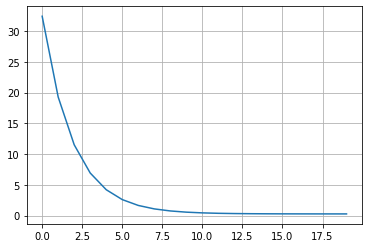

In [17]:
# Training
epochs = 20  # Number of iteration
hist = []   # Placeholder to keep the loss in each step

lr = 0.002                                              # Step 1: Choose learning rate
lerning_params = initialize_weights(1, 1)               # Step 2. Initialize W and b
initial_weights = copy.deepcopy(lerning_params)  

for i in range(epochs):
    z = fun(X, lerning_params)                          # Step 3. Calculate z = xw + b
    a = sigma(z)                                        # Step 4. Activate function
    loss = loss_function(a, y)                          # Step 5. Calculate the cost function
    hist.append(loss)     # keep track of losses              
    da = dl_da(a, y)                                    # Step 6. Calculate dl/da
    dz = dl_dz(a, da)                                   # Step 7. Calculate dl/dz
    grad = dparams(X, dz)                               # Step 8. Calculate dl/dw and dl/db
    lerning_params = update(lerning_params, grad, lr)   # Step 9. Update W and b
    
    if i%20 ==0:
        print(f"Epoch: {i}, loss: {loss}")

plt.figure()
plt.plot(hist)
plt.grid()

Let's plot the result of untrained and trained models.

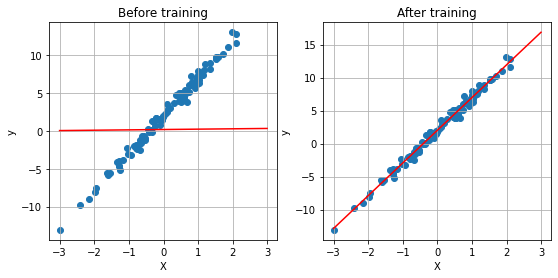

In [18]:
fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(121)
plot_test(initial_weights, 'Before training')

ax = fig.add_subplot(122)
plot_test(lerning_params, 'After training')



<a id='training_1_tf'></a>
### 1.6 Training With TensorFlow

The same problem can be solved easily with TensorFlow.

We create a network with one layer which gets one input (`input_shape=[1]`) and gives one output (`units=1`). This layer uses linear activation (`activation='linear'`).

In [19]:
from tensorflow import keras

class LinearRegression(keras.Model):
    def __init__(self, units, input_shape):
        super(LinearRegression, self).__init__()
        self.dense = keras.layers.Dense(units=units, input_shape=input_shape, activation='linear')
    
    def call(self, inputs):
        x = self.dense(inputs)
        return x
    
    
model = keras.Sequential([
    LinearRegression(units=1, input_shape=[1])
    ])    
   

2022-04-24 19:29:02.321553: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


After creating the model, we compile it.

In [20]:
model.compile(optimizer='sgd',      # Gradient descent optimizer
              loss='mse'            # Mean squared error as loss function 
) 

And now, we train the model

In [21]:
history = model.fit(X.T,              # Training samples
                    y.T,              # Training labels
                    epochs=epochs,  # Number of iteration
                    verbose=0       # Status of prining information 
                    )

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 linear_regression (LinearRe  (None, 1)                2         
 gression)                                                       
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Let's compare the result of our linear regression and TensorFlow's.

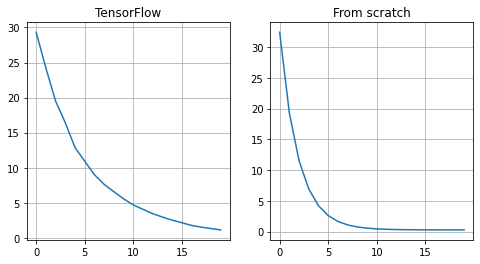

In [23]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax.plot(history.history['loss'])
ax.set_title('TensorFlow')
ax.grid()
ax = fig.add_subplot(122)
ax.plot(hist)
ax.set_title('From scratch')
ax.grid()

We can get the model parameters using `model.weights`.

In [24]:
tf_params = {'w': model.weights[0].numpy(),
             'b': model.weights[1].numpy()
}

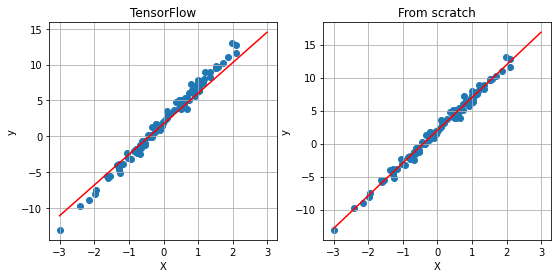

In [25]:
fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(121)
plot_test(tf_params, 'TensorFlow')

ax = fig.add_subplot(122)
plot_test(lerning_params, 'From scratch')

Before going further, I organize our training code as follows

In [26]:
class LinearRegression_scratch():
    def __init__(self, units, n_input, lr=0.002, verbose=0):
        self. n_input = n_input
        self.lr = lr
        self.verbose = verbose
        self.units = units
        
        self.weights = initialize_weights(units=units, n_input=n_input)
        
    def fit(self, X, y, epochs):
        history = {'loss': []}   

        for i in range(epochs):
            z = fun(X, self.weights)                          
            a = sigma(z)                                        
            loss = loss_function(a, y)                          
            history['loss'].append(loss)                  
            da = dl_da(a, y)                                   
            dz = dl_dz(a, da)                                
            grad = dparams(X, dz)                              

            update(self.weights, grad, self.lr)  
            
            if self.verbose == 1:
                print(f"Epoch: {i}, loss: {loss}")
        
        return history

<a id='2in_1out'></a>
## 2. Multiple Input - One Output

Now let's make a model with multi-dimensional input.

<center>
<img src='./img/2in_1out.png' alt='2in_1out' height=200px>
</center>


In [27]:
N = 100
m = 3 
units = 1
input_shape = m - 1

X = np.random.randn(input_shape, N)
b_true = 2
w_true = np.array([5, 2]).reshape(input_shape, units)

noise_scale = 0.5
noise = np.random.normal(scale=noise_scale, size=(1, N))
y = w_true.T @ X + b_true + noise

print(f"Shape of X: {X.shape}")
print(f'Shape of W: {w_true.shape}')
print(f'Shape of y: {y.shape}')
print(f'Shape of b: {np.shape(b_true)}')

Shape of X: (2, 100)
Shape of W: (2, 1)
Shape of y: (1, 100)
Shape of b: ()


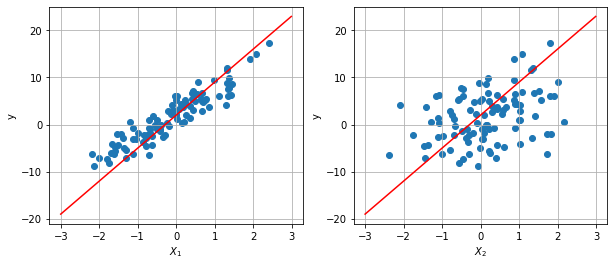

In [28]:
def plot_test_2in(lerning_params, title=None):

    x_test = np.vstack((np.arange(-3, 3, 0.01).reshape(1, -1),
                    np.arange(-3, 3, 0.01).reshape(1, -1)))

    y_pred = fun(x_test, lerning_params)

    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_subplot(121)
    ax.scatter(X[0, :], y)
    plt.plot(x_test[0, :].T, y_pred.T, 'r')
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('y')
    plt.grid()

    ax = fig.add_subplot(122)
    ax.scatter(X[1, :], y)
    plt.plot(x_test[1, :].T, y_pred.T, 'r')
    ax.set_xlabel('$X_2$')
    ax.set_ylabel('y')
    plt.grid()
    plt.suptitle(title)
    
plot_test_2in({'w':w_true, 'b':b_true}, title=None)


Thereby, the number of inputs in this part is 2.

In [29]:
n_input = 2

<a id='training_2'></a>
### 2.1 Training From Scratch

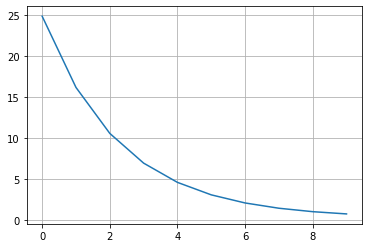

In [30]:
# Training
epochs = 10  # Number of iteration

model_scratch = LinearRegression_scratch(units=units, n_input=n_input)
hist =  model_scratch.fit(X, y, epochs)

plt.figure()
plt.plot(hist['loss'])
plt.grid()

Finally the result is

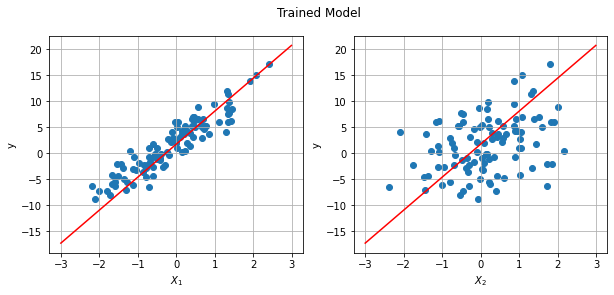

In [31]:
plot_test_2in(model_scratch.weights, title='Trained Model')

<a id='training_2_tf'></a>
### 2.2 Training With TensorFlow

Now, let's train the model using TensorFlow.

In [32]:
model = keras.Sequential([
    LinearRegression(units=1, input_shape=[n_input])
    ])  

model.compile(optimizer='sgd',
              loss='mse'
              )

history = model.fit(X.T, y.T, epochs=epochs, verbose=0)

model.summary()
        

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 linear_regression_1 (Linear  (None, 1)                3         
 Regression)                                                     
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


As is shown, we have 3 parameters to train ($w_1$, $w_2$, and $b$).

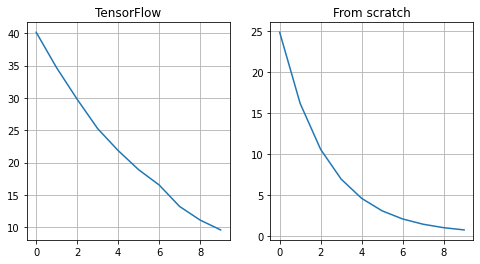

In [33]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax.plot(history.history['loss'])
ax.set_title('TensorFlow')
ax.grid()
ax = fig.add_subplot(122)
ax.plot(hist['loss'])
ax.set_title('From scratch')
ax.grid()

In [34]:
tf_params = {'w': model.weights[0].numpy(),
             'b': model.weights[1].numpy()
}

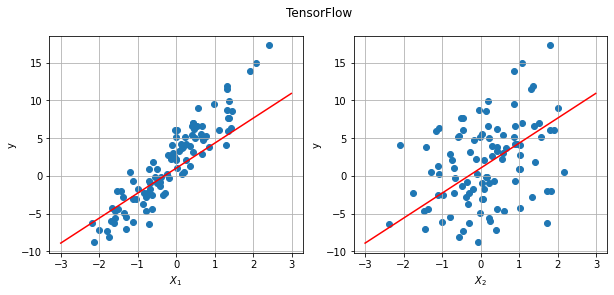

In [35]:
plot_test_2in(tf_params, title='TensorFlow')

In [36]:
print(f"True value of weights: {w_true.reshape(-1)}")
print(f"Weights from our code: {model_scratch.weights['w'].reshape(-1)}")
print(f"Weights from TensorFlow: {tf_params['w'].reshape(-1)}")


True value of weights: [5 2]
Weights from our code: [4.46124921 1.88815475]
Weights from our TensorFlow: [2.6159163 0.6902651]


In [37]:
print(f"True value of bias: {b_true}")
print(f"Bias from our code: {model_scratch.weights['b'].reshape(-1)}")
print(f"Bias from TensorFlow: {tf_params['b'].reshape(-1)}")

True value of bias: 2
Bias from our code: [1.78891717]
Bias from our TensorFlow: [1.0209153]


### [TOP ☝️](#top)